Code for preliminary evaluations of BG connectivity

In [1]:
from nilearn import plotting
from pathlib import Path

import Functional_Fusion.dataset as ds
import Functional_Fusion.atlas_map as am

/Users/lshahsha/Documents/GitHub/selective_recruitment/.sr-venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
# setting defaults
atlas = 'MNIAsymBg2'
atlas_obj, ainfo = am.get_atlas(atlas)

# display the atlas 

In [4]:
# dataset_ho = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr50-2mm")
# atlas_ho_filename = dataset_ho.filename
# print(f"Atlas ROIs are located at: {atlas_ho_filename}")
# plotting.plot_roi(atlas_ho_filename, title="Harvard Oxford atlas")

# Overal reliability
## MDTB
### within and between subject for ses-s1

In [6]:
# get dataset class
dataset_name = "MDTB"
atlas = 'MNIAsymBg2'

data_tensor, info, DATA = ds.get_dataset(base_dir = base_dir, 
                                        dataset = dataset_name, 
                                        sess = "ses-s1", 
                                        atlas=atlas, 
                                        type = "CondHalf", 
                                        smooth = None)


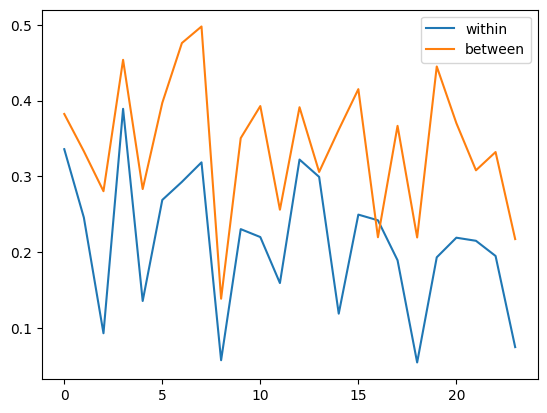

In [7]:
r1 = ds.reliability_within_subj(data_tensor,part_vec=info.half,cond_vec=info.cond_name)
r2 = ds.reliability_between_subj(data_tensor,cond_vec=info.cond_name)
plt.plot(r1.mean(axis=1))
plt.plot(r2)
plt.legend(['within','between'])

### within and between subject for ses-s2

In [8]:
data_tensor, info, DATA = ds.get_dataset(base_dir = base_dir, 
                                        dataset = dataset_name, 
                                        sess = "ses-s2", 
                                        atlas=atlas, 
                                        type = "CondHalf", 
                                        smooth = None)


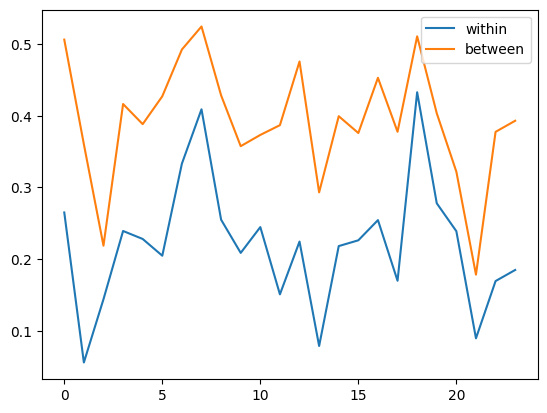

In [9]:
r1 = ds.reliability_within_subj(data_tensor,part_vec=info.half,cond_vec=info.cond_name)
r2 = ds.reliability_between_subj(data_tensor,cond_vec=info.cond_name)
plt.plot(r1.mean(axis=1))
plt.plot(r2)
plt.legend(['within','between'])

## WMFS
### within and between subject for ses-01 (Motor task)

In [10]:
# get dataset class
dataset_name = "WMFS"
atlas = 'MNIAsymBg2'

data_tensor, info, DATA = ds.get_dataset(base_dir = base_dir, 
                                        dataset = dataset_name, 
                                        sess = "ses-01", 
                                        atlas=atlas, 
                                        type = "CondHalf", 
                                        smooth = None)

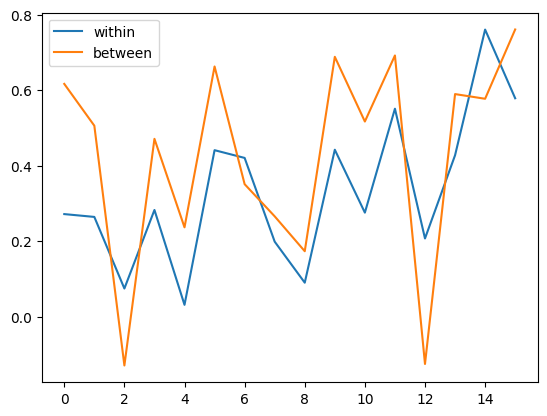

In [11]:
r1 = ds.reliability_within_subj(data_tensor,part_vec=info.half,cond_vec=info.cond_name)
r2 = ds.reliability_between_subj(data_tensor,cond_vec=info.cond_name)
plt.plot(r1.mean(axis=1))
plt.plot(r2)
plt.legend(['within','between'])

### within and between subject for ses-02 (WM task)

In [12]:
data_tensor, info, DATA = ds.get_dataset(base_dir = base_dir, 
                                        dataset = dataset_name, 
                                        sess = "ses-02", 
                                        atlas=atlas, 
                                        type = "CondHalf", 
                                        smooth = None)

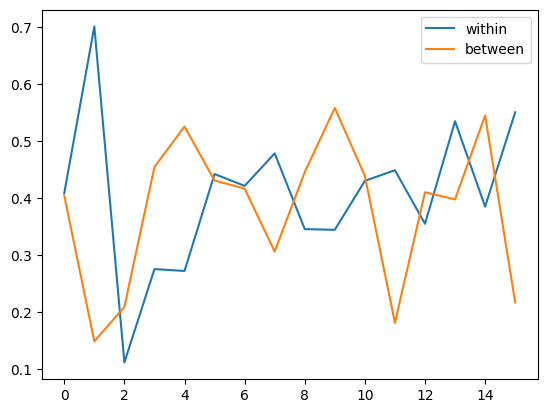

In [13]:
r1 = ds.reliability_within_subj(data_tensor,part_vec=info.half,cond_vec=info.cond_name)
r2 = ds.reliability_between_subj(data_tensor,cond_vec=info.cond_name)
plt.plot(r1.mean(axis=1))
plt.plot(r2)
plt.legend(['within','between'])

# reliability maps
## MDTB

In [4]:
rmap, ses = ds.reliability_maps(base_dir, dataset_name = "MDTB", atlas=atlas,
                                subtract_mean=True, voxel_wise=True, subject_wise=False)

In [10]:
# convert to nifti
## get atlas object
atlas = 'MNIAsymBg2'
atlas_obj, ainfo = am.get_atlas(atlas)

# convert data to nifti object
nii_img0 = atlas_obj.data_to_nifti(rmap[0, :]) # reliability map for session 1
nii_img1 = atlas_obj.data_to_nifti(rmap[1, :]) # reliability map for session 2

/Users/lshahsha/Documents/GitHub/selective_recruitment/.sr-venv/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(



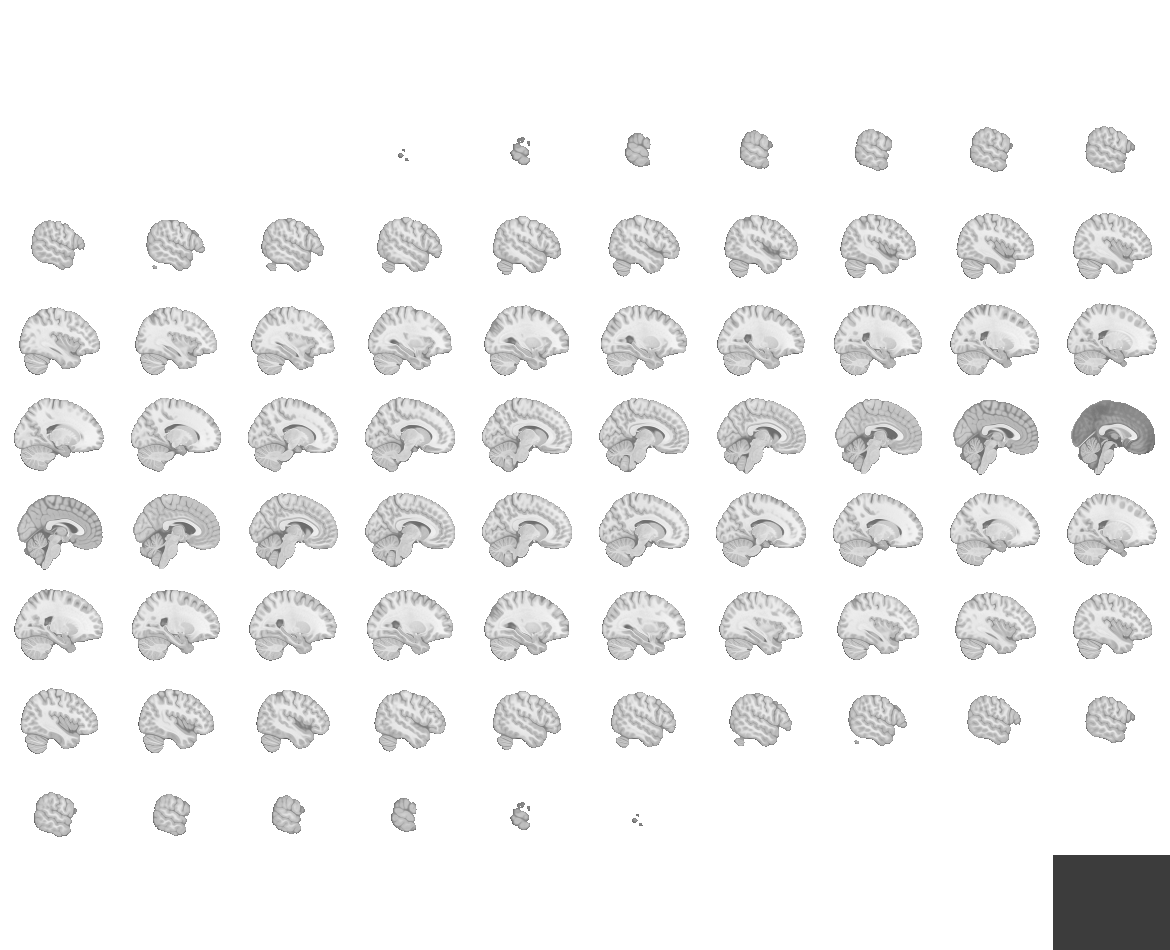
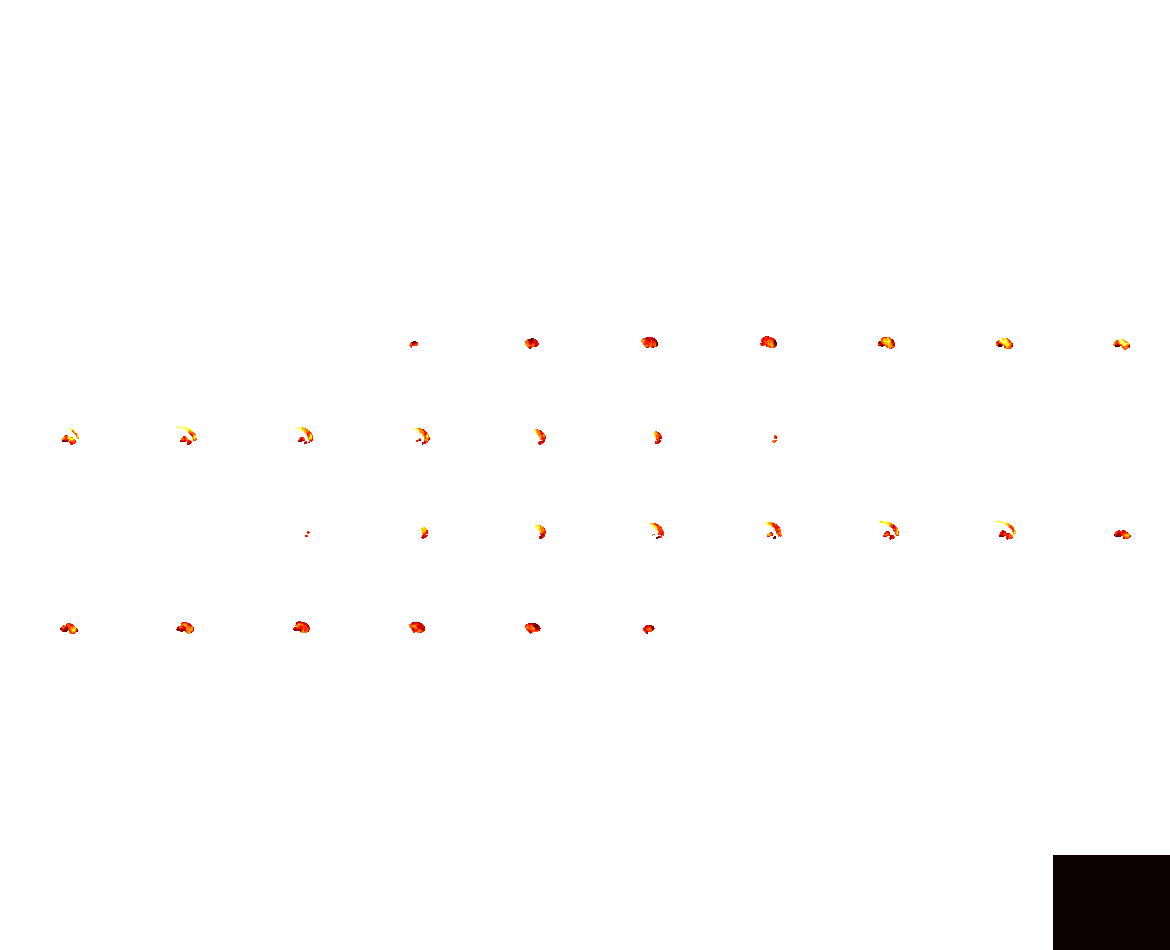

In [16]:
view = plotting.view_img(nii_img1, black_bg=False)
view


## WMFS


In [17]:
rmap, ses = ds.reliability_maps(base_dir, dataset_name = "WMFS", atlas=atlas,
                                subtract_mean=True, voxel_wise=True, subject_wise=False)

In [18]:
# convert data to nifti object
nii_img0 = atlas_obj.data_to_nifti(rmap[0, :]) # reliability map for session 1
nii_img1 = atlas_obj.data_to_nifti(rmap[1, :]) # reliability map for session 2

/Users/lshahsha/Documents/GitHub/selective_recruitment/.sr-venv/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(



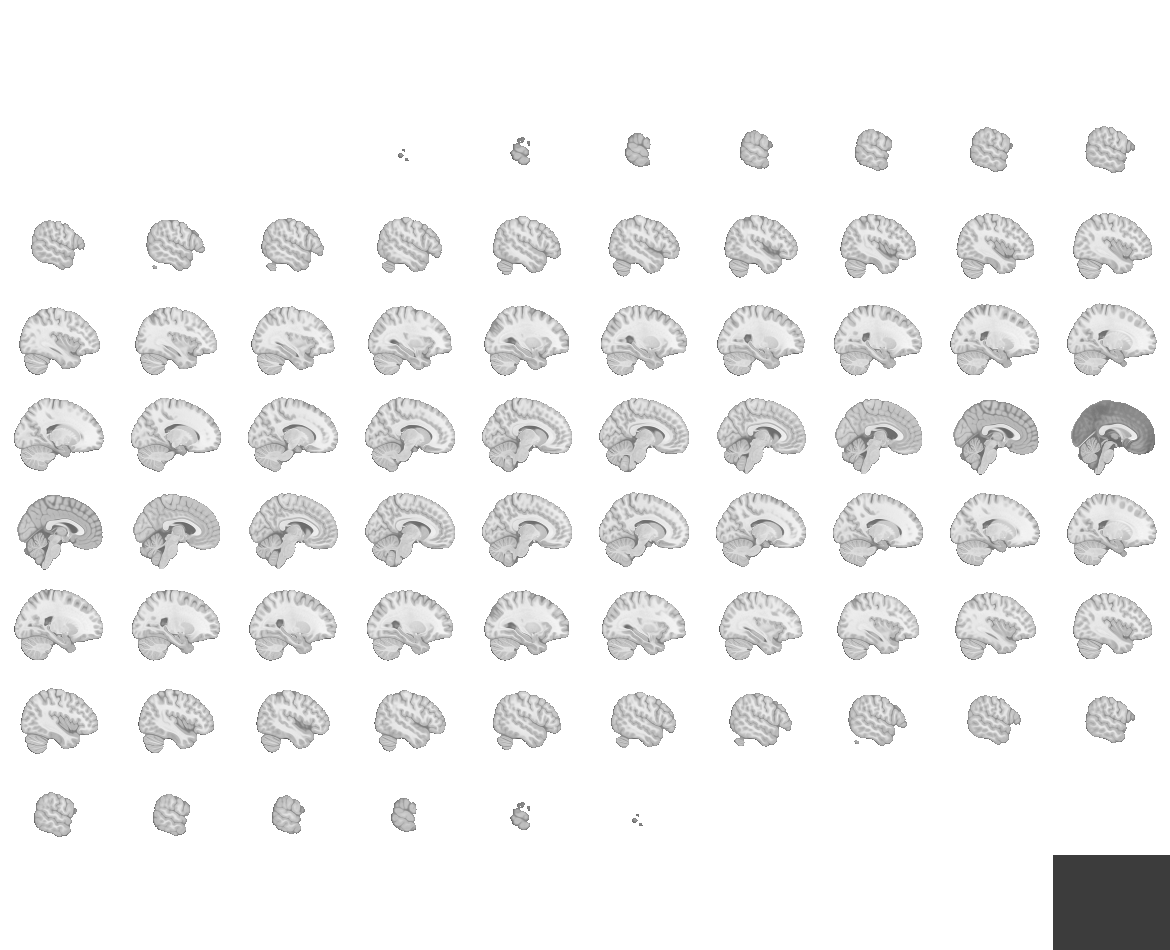
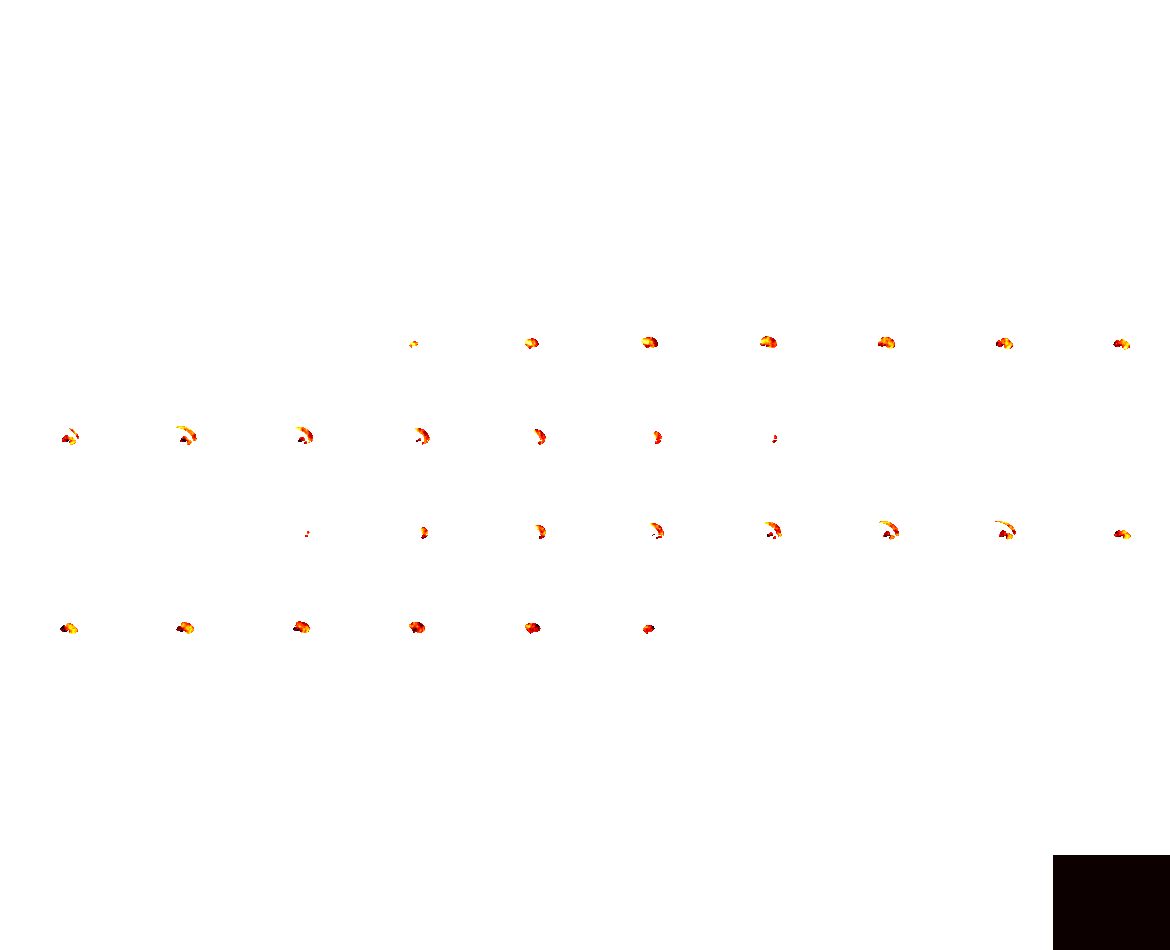

In [21]:
view = plotting.view_img(nii_img1, black_bg=False)
view
